In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FPT.csv')

In [3]:
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [5]:
df['Open Interest'].value_counts()

Open Interest
0    97406
Name: count, dtype: int64

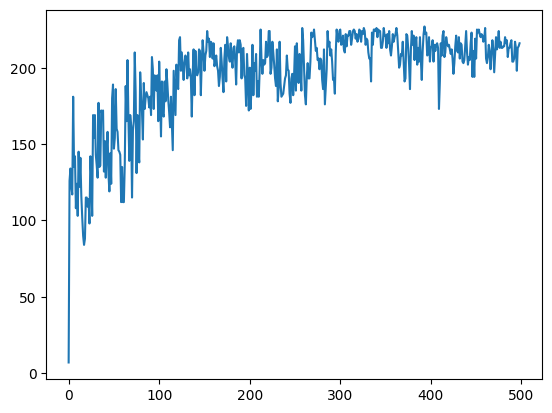

In [28]:
grouped = df.groupby(df['Date/Time'].dt.date)
dfs = [group for _, group in grouped]
list = []

for df1 in dfs:
    list.append(len(df1))

plt.plot(list)

In [6]:
df.drop(columns=['Open Interest'], inplace=True)

In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

<Axes: >

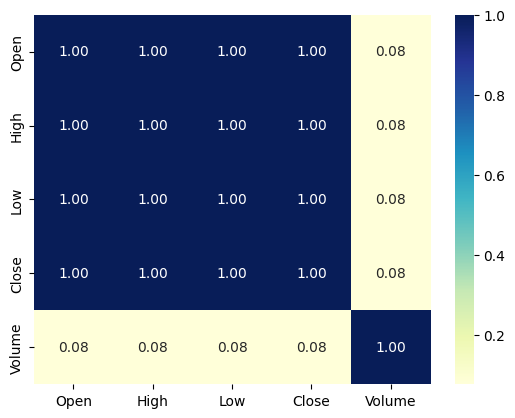

In [8]:
sns.heatmap(df.corr(method='pearson',numeric_only=True), annot=True, fmt='.2f', cmap='YlGnBu')

In [9]:
df['Next Turn'] = df['Close'].shift(-1)

In [10]:
df['Price volatility'] = (df['Next Turn'] > df['Close']).astype(int)

In [11]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Next Turn,Price volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,30.81,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,30.74,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,30.74,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,30.74,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,30.74,0
...,...,...,...,...,...,...,...,...,...
97401,FPT,2020-12-22 14:24:00,58.20,58.20,58.20,58.20,27470,58.20,0
97402,FPT,2020-12-22 14:25:00,58.20,58.20,58.20,58.20,14820,58.20,0
97403,FPT,2020-12-22 14:26:00,58.20,58.20,58.20,58.20,500,58.10,0
97404,FPT,2020-12-22 14:29:00,58.10,58.10,58.10,58.10,2500,58.10,0


0 - Equal or Down
1 - Up


In [12]:
df['Price volatility'].value_counts()

Price volatility
0    77106
1    20300
Name: count, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
df.loc[round(97406*0.8)]

Ticker                              FPT
Date/Time           2020-08-14 09:34:00
Open                              48.05
High                               48.1
Low                               48.05
Close                              48.1
Volume                            14320
Next Turn                          48.1
Price volatility                      0
Name: 77925, dtype: object

In [15]:
from datetime import datetime
date_string = '2020-08-14 09:34:00'

date = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')

train = df[df['Date/Time']<=date]
test = df[df['Date/Time']>date]

In [16]:
predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

model.fit(train[predictors], train['Price volatility'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score

predict_result = pd.Series(model.predict(test[predictors]), index=test.index)

In [18]:
predict_result

77926    0
77927    0
77928    0
77929    0
77930    0
        ..
97401    0
97402    0
97403    0
97404    0
97405    0
Length: 19480, dtype: int32

In [19]:
precision_score(test['Price volatility'], predict_result)

0.4253393665158371

Tỉ lệ dự đoán chính xác tăng giảm của mô hình xấp xỉ 43%


<Axes: >

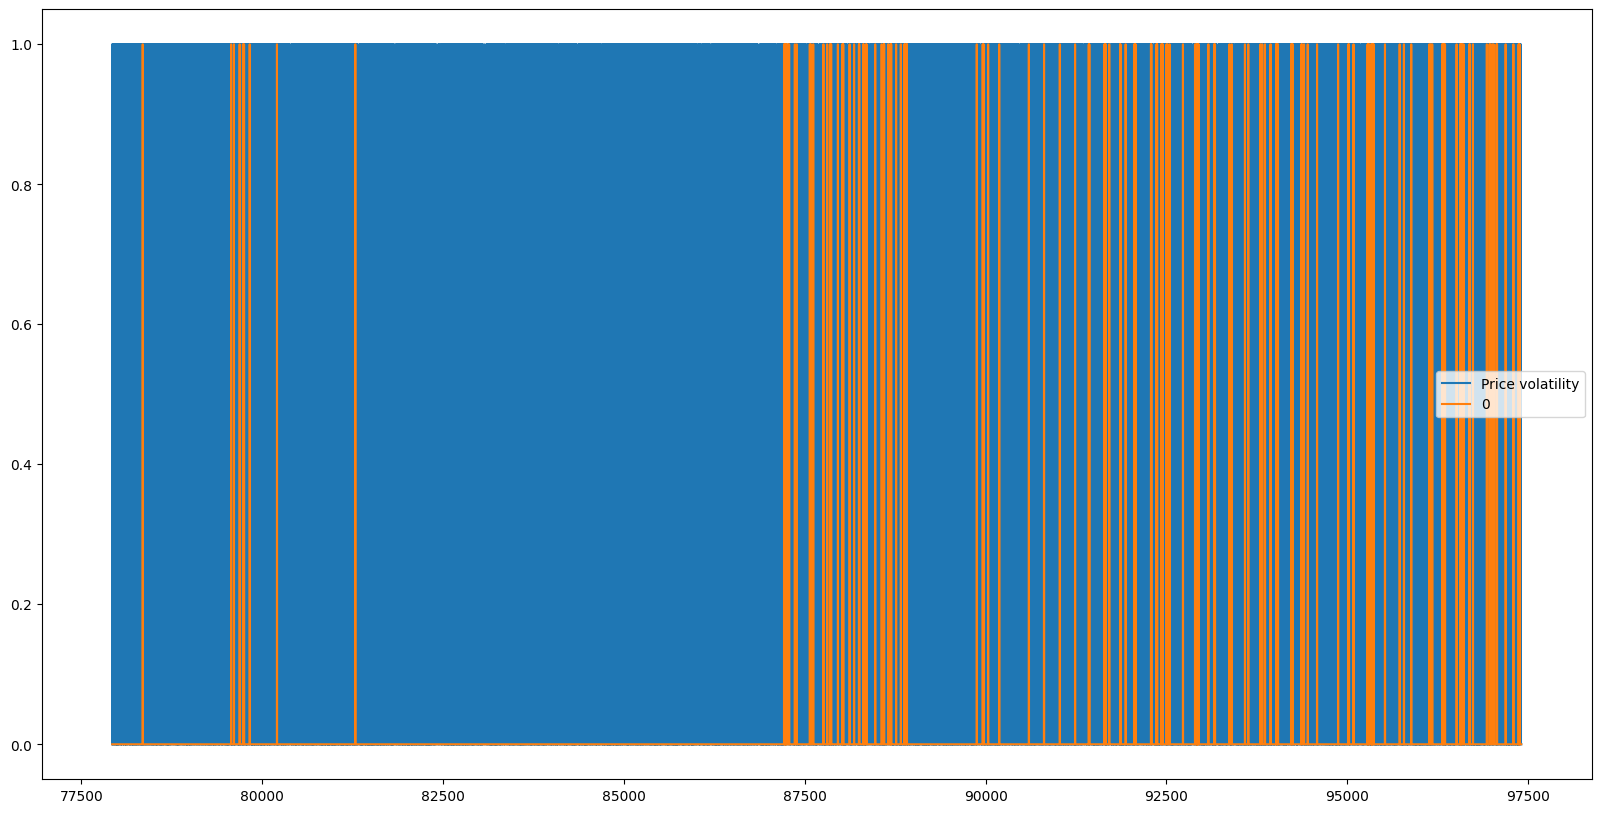

In [20]:
visual = pd.concat([test['Price volatility'], predict_result], axis=1)

visual.plot(figsize=(20,10))

In [21]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Next Turn,Price volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,30.81,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,30.74,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,30.74,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,30.74,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,30.74,0
...,...,...,...,...,...,...,...,...,...
97401,FPT,2020-12-22 14:24:00,58.20,58.20,58.20,58.20,27470,58.20,0
97402,FPT,2020-12-22 14:25:00,58.20,58.20,58.20,58.20,14820,58.20,0
97403,FPT,2020-12-22 14:26:00,58.20,58.20,58.20,58.20,500,58.10,0
97404,FPT,2020-12-22 14:29:00,58.10,58.10,58.10,58.10,2500,58.10,0


Thêm 1 số feature về phân tích kỹ thuật vào


In [22]:
import ta 

df_new = df.copy()

df_new['RSI'] = ta.momentum.RSIIndicator(df_new['Close']).rsi()

df_new

,Ticker,Date/Time,Open,High,Low,Close,Volume,Next Turn,Price volatility,RSI
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,30.81,0,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,30.74,0,NaN
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,30.74,0,NaN
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,30.74,0,NaN
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,30.74,0,NaN
...,...,...,...,...,...,...,...,...,...,...
97401,FPT,2020-12-22 14:24:00,58.20,58.20,58.20,58.20,27470,58.20,0,58.598755
97402,FPT,2020-12-22 14:25:00,58.20,58.20,58.20,58.20,14820,58.20,0,58.598755
97403,FPT,2020-12-22 14:26:00,58.20,58.20,58.20,58.20,500,58.10,0,58.598755
97404,FPT,2020-12-22 14:29:00,58.10,58.10,58.10,58.10,2500,58.10,0,48.632330


In [23]:
df_new['RSI'].isna().sum()

13

In [24]:
macd = ta.trend.MACD(df_new['Close'])
df_new['MACD'], df_new['MACD_Signal'], df_new['MACD_Hist'] = macd.macd(), macd.macd_signal(), macd.macd_diff()


In [25]:
df_new.dropna(inplace=True)

In [26]:
train = df_new[:round(len(df_new)*0.8)]
test = df_new[round(len(df_new)*0.8):]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
model.fit(train[predictors], train['Price volatility'])

predict_result = pd.Series(model.predict(test[predictors]), index=test.index)
precision_score(test['Price volatility'], predict_result)


0.4444444444444444

Sau khi thêm một số thuộc tính về phân tích kĩ thuật độ chính xác có tăng lên nhưng không đáng kể
